In [30]:
import pandas as pd

df = pd.read_csv("riders.csv")


In [31]:
df

,all_riders,rider_class,stage,points,stage_class
0,Tadej Pogačar,All Rounder,X1,15,flat
1,Tadej Pogačar,All Rounder,X2,219,hills
2,Tadej Pogačar,All Rounder,X3,34,flat
3,Tadej Pogačar,All Rounder,X4,264,hills
4,Tadej Pogačar,All Rounder,X6,114,hills
...,...,...,...,...,...
3491,Fabian Lienhard,Unclassed,X17,0,flat
3492,Fabian Lienhard,Unclassed,X18,0,mount
3493,Fabian Lienhard,Unclassed,X19,0,mount
3494,Fabian Lienhard,Unclassed,X20,0,hills


In [32]:
df.head()

,all_riders,rider_class,stage,points,stage_class
0,Tadej Pogačar,All Rounder,X1,15,flat
1,Tadej Pogačar,All Rounder,X2,219,hills
2,Tadej Pogačar,All Rounder,X3,34,flat
3,Tadej Pogačar,All Rounder,X4,264,hills
4,Tadej Pogačar,All Rounder,X6,114,hills


In [41]:
df.tail()

,all_riders,rider_class,stage,points,stage_class
3491,Fabian Lienhard,Unclassed,X17,0,flat
3492,Fabian Lienhard,Unclassed,X18,0,mount
3493,Fabian Lienhard,Unclassed,X19,0,mount
3494,Fabian Lienhard,Unclassed,X20,0,hills
3495,Fabian Lienhard,Unclassed,X21,0,flat


In [43]:
df.shape

(3496, 5)

In [39]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3496 entries, 0 to 3495
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   all_riders   3496 non-null   object
 1   rider_class  3496 non-null   object
 2   stage        3496 non-null   object
 3   points       3496 non-null   int64 
 4   stage_class  3496 non-null   object
dtypes: int64(1), object(4)
memory usage: 136.7+ KB


In [37]:
df.columns

Index(['all_riders', 'rider_class', 'stage', 'points', 'stage_class'], dtype='object')

In [44]:
df.isnull().sum()

all_riders     0
rider_class    0
stage          0
points         0
stage_class    0
dtype: int64

In [40]:
df['rider_class'].value_counts()
df['stage_class'].value_counts()


stage_class
hills    1472
flat     1104
mount     920
Name: count, dtype: int64

# step 3

In [45]:
df['points'].describe()

count    3496.000000
mean       12.385297
std        36.285334
min         0.000000
25%         0.000000
50%         0.000000
75%         8.000000
max       304.000000
Name: points, dtype: float64

In [46]:
df.groupby('rider_class')['points'].agg(
    ['count', 'mean', 'median', 'std', 'min', 'max']
)


,count,mean,median,std,min,max
rider_class,,,,,,
All Rounder,323,37.687307,12.0,63.961640,0,304
Climber,437,20.169336,6.0,43.447254,0,269
Sprinter,551,15.036298,0.0,41.832247,0,272
Unclassed,2185,6.419680,0.0,23.282527,0,260


In [47]:
df.groupby('stage_class')['points'].agg(
    ['count', 'mean', 'median', 'std', 'min', 'max']
)


,count,mean,median,std,min,max
stage_class,,,,,,
flat,1104,11.794384,0.0,33.219268,0,272
hills,1472,12.520380,0.0,36.130357,0,274
mount,920,12.878261,0.0,39.906588,0,304


In [48]:
df.groupby(['rider_class', 'stage_class'])['points'].agg(
    ['count', 'mean', 'median', 'std']
)


count       mean  median        std
rider_class stage_class                                     
All Rounder flat           102  15.441176     8.0  28.281671
            hills          136  35.786765    12.5  57.459217
            mount           85  67.423529    17.0  88.955898
Climber     flat           138   5.094203     1.5   6.230239
            hills          184  21.668478     7.0  45.984482
            mount          115  35.860870    12.0  57.019985
Sprinter    flat           174  38.977011     2.5  63.588267
            hills          232   5.202586     0.0  21.950897
            mount          145   2.041379     0.0   5.886515
Unclassed   flat           690   5.740580     0.0  19.801356
            hills          920   9.096739     0.0  30.662585
            mount          575   2.951304     0.0   7.905654

# step 3.4

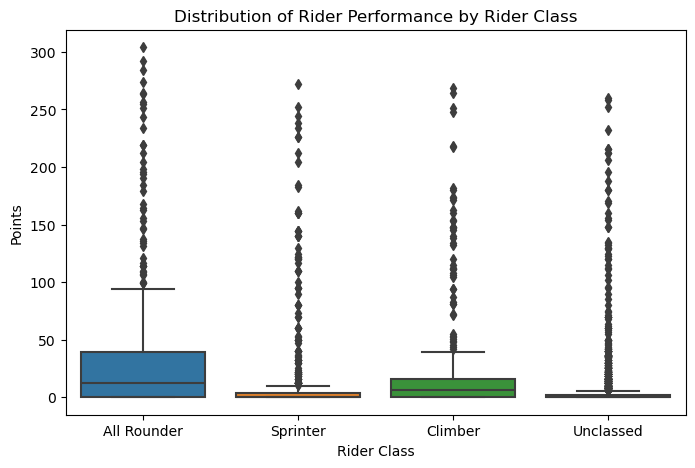

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='rider_class', y='points')
plt.xlabel("Rider Class")
plt.ylabel("Points")
plt.title("Distribution of Rider Performance by Rider Class")
plt.show()


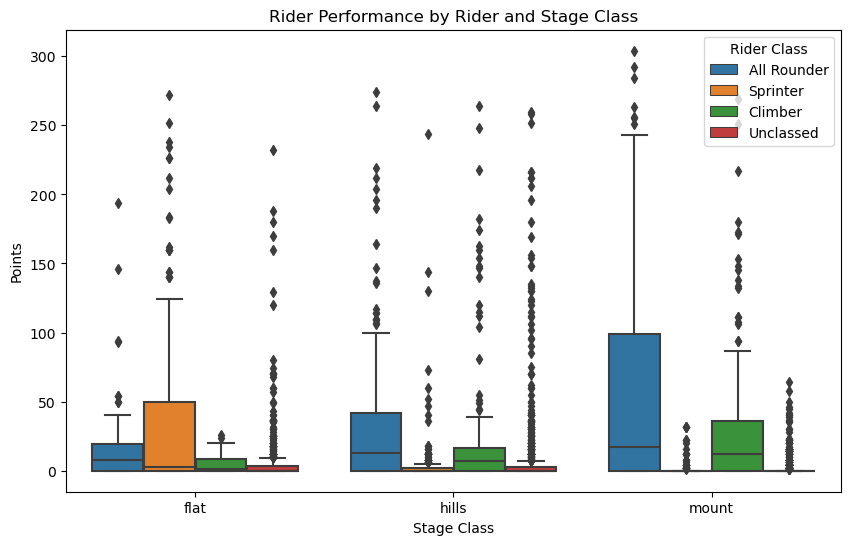

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='stage_class', y='points', hue='rider_class')
plt.xlabel("Stage Class")
plt.ylabel("Points")
plt.title("Rider Performance by Rider and Stage Class")
plt.legend(title="Rider Class")
plt.show()


# step 4.4

In [52]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model_rider = ols('points ~ C(rider_class)', data=df).fit()
anova_rider = sm.stats.anova_lm(model_rider, typ=2)
anova_rider


,sum_sq,df,F,PR(>F)
C(rider_class),3.148937e+05,3.0,85.505214,2.198409e-53
Residual,4.286712e+06,3492.0,NaN,NaN


In [53]:
model_stage = ols('points ~ C(stage_class)', data=df).fit()
anova_stage = sm.stats.anova_lm(model_stage, typ=2)
anova_stage


,sum_sq,df,F,PR(>F)
C(stage_class),6.359253e+02,2.0,0.241393,0.785546
Residual,4.600970e+06,3493.0,NaN,NaN


In [54]:
model_interaction = ols(
    'points ~ C(rider_class) * C(stage_class)',
    data=df
).fit()

anova_interaction = sm.stats.anova_lm(model_interaction, typ=2)
anova_interaction


,sum_sq,df,F,PR(>F)
C(rider_class),3.148937e+05,3.0,92.816103,8.703760e-58
C(stage_class),6.359253e+02,2.0,0.281162,7.549231e-01
C(rider_class):C(stage_class),3.460646e+05,6.0,51.001926,2.041749e-60
Residual,3.940012e+06,3484.0,NaN,NaN
